In [1]:
# %load std_libraries.py
#to keep my scripts consistent, I am adding this to the top of all scripts with %load std_libraries.py
import sys
#Indicate operating environment and import core modules
location_input = input("what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = other")
location_dict = {'a': "C:\\Users\\BMH_work\\github\\expression_broad_data", 'b': "/home/heineike/github/expression_broad_data",
                 'c': "C:\\Users\\Ben\\Documents\\GitHub\\expression_broad_data", 'd':'you need to add your location to the location_dict'}
base_dir = location_dict[location_input]
print("base directory is " + base_dir)

if sys.path[-1] != base_dir:
    sys.path.append(base_dir)
    print("Added " + base_dir + " to path: " )
    print(sys.path)

import os

print("I am about to import a library")
from core import expression_plots 
from core import io_library 
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook
data_processing_dir = base_dir + os.sep + os.path.normpath("expression_data") + os.sep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.colormap as cm
#from matplotlib_venn import venn2
#for my windows10 laptop I had to install this package using pip rather than anaconda.  
import seaborn as sns; sns.set(style="ticks", color_codes=True)
#from sklearn import linear_model
import pickle
#import subprocess
#import networkx as nx
import scipy.stats as stats
#import statsmodels.graphics.gofplots as stats_graph
#import scipy.cluster.hierarchy as sch

# from Bio import SeqIO
# from Bio import SeqFeature as sf
# from Bio.Alphabet import generic_dna
# from Bio.Seq import Seq

# import re

from collections import Counter
# import scipy.stats as stats
# from itertools import chain
#from itertools import product
#this only works if you are online
online_input = input("are you online? Yes/No ")
if online_input == "Yes": 
    import plotly.plotly as py
    import plotly.graph_objs as pygo
    import plotly.tools as pytools
    py.sign_in('heineike02_student','9dMTMZgJMgUP0YX0P5mQ')
    #py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')
    
# for phylogenetic trees: 
# from ete3 import Tree
#ete3 is not officially supported on windows, and so must be loaded via pip: 
# pip install -U https://github.com/etetoolkit/ete/archive/qt5.zip
# ref: https://groups.google.com/forum/#!topic/etetoolkit/6NblSBPij4o

#for scraping internet data (e.g. ncbi)
#import requests
#from lxml import etree    #parses xml output

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = othera
base directory is C:\Users\BMH_work\github\expression_broad_data
Added C:\Users\BMH_work\github\expression_broad_data to path: 
['', 'C:\\Users\\BMH_work\\github\\expression_broad_data\\scripts', 'C:\\Users\\BMH_work\\Anaconda3\\python37.zip', 'C:\\Users\\BMH_work\\Anaconda3\\DLLs', 'C:\\Users\\BMH_work\\Anaconda3\\lib', 'C:\\Users\\BMH_work\\Anaconda3', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\BMH_work\\.ipython', 'C:\\Users\\BMH_work\\github\\expression_broad_data']
I am about to import a library
I am importing io_library
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = other

In [2]:
#Compare both species AS +/- drug

# Combine data from both species
#eventually I might want a big database here but for now just going to load what I need. 


#Load KL to SC ortholog mapping

kl_orthologs = pd.read_pickle(data_processing_dir + "ortholog_files_YGOB/kl_orthologs.pkl")

#Load data for each species and combine desired data into one dataframe per species. 

lfc_data = {}
# rlog_data = {}
# raw_data = {}
comparison_data = {}

species = ['KL', 'SC']
# conditions = ["AS_noNMPP1_YPD_t40", "AS_yesNMPP1_YPD_t40"]
for spec in species: 
    #Load DEseq data for AS +/- drug
    lfc_data_spec = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_' + spec + '_AS_WT_nmpp1.csv'), index_col=0)
    if spec == 'KL':
        kl_genenames = io_library.kl_genename_convert_list(lfc_data_spec.index)
        lfc_data_spec['kl_genename'] = kl_genenames
        lfc_data_spec.set_index('kl_genename',inplace = True)
    lfc_data_spec.index.name = spec.lower() + "_genename"
    
    lfc_data[spec] = lfc_data_spec

    #     fname_rlog_data = data_processing_dir + '20170817_klscpka/20170817_klscpka_avg_rlog_' + spec + '.csv'
    #     rlog_data[spec] = pd.read_csv(fname_rlog_data,index_col = 0)
    #     fname_raw_data = data_processing_dir + '20170817_klscpka/20170817_klscpka_avg_counts_' + spec + '.csv'
    #     raw_data[spec] = pd.read_csv(fname_raw_data,index_col = 0)

    #     #These are the genes that have no rlog value
    #     print('The following ' + str(len(set(lfc_data[spec].index)-set(rlog_data[spec].index))) + ' genes have no rlog data for ' + spec)
    #     print(set(lfc_data[spec].index)-set(rlog_data[spec].index))

    #     #Merge into one dataset
    #     labels_mean = [condition + "_mean" for condition in conditions]
    #     labels_var = [condition + "_var" for condition in conditions]
    #     labels = list(chain.from_iterable([labels_mean,labels_var]))

    #     rlog_subset = rlog_data[spec].loc[:,labels]
    #     rlog_subset.rename(index = str, columns = {label: 'rlog_' + label for label in labels},inplace=True)

    #     raw_subset = raw_data[spec].loc[:,labels]
    #     raw_subset.rename(index = str, columns = {label: 'raw_' + label for label in labels},inplace=True)
    
    comparison_data[spec] =  lfc_data_spec  #pd.concat([lfc_data[spec], rlog_subset , raw_subset],axis = 1)

#Map KL PKA inhibition data onto related SC orthologs
kl_comparison_data_sc_orthologs = kl_orthologs.merge(comparison_data['KL'], left_on='kl_genename', right_index=True, how = 'inner')

#add in SC_common_name to SC data
sc_comparison_data=comparison_data['SC']
sc_comparison_data['SC_common_name']= io_library.SC_common_name_lookup(sc_comparison_data.index)
#Just noticed that IMP2 has a common name IMP2' - should troubleshoot that someday. 

kl_sc_PKA_data = kl_comparison_data_sc_orthologs.merge(sc_comparison_data, on = 'sc_genename', suffixes=('_KL','_SC'), how='inner')

fname_cross_spec_comparison = data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/cross_species_compare_ASminus_ASplus_YPD_20181204.csv")
kl_sc_PKA_data.to_csv(fname_cross_spec_comparison)


In [2]:
#Load kl_sc_PKA data

fname_cross_spec_comparison = data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/cross_species_compare_ASminus_ASplus_YPD_20181204.csv")
kl_sc_PKA_data = pd.read_csv(fname_cross_spec_comparison, index_col=0)

In [8]:

print(r)
print(pval)
        

0.6551637588839935
0.0


In [22]:
precursor = ['NDE2', 'GAC1', 'YJL045W', 'GLG1', 'GSM1', 'COX5B', 'COX20', 'CYC7', 'MBR1', 'GDB1', 'LSC2', 'AAC1', 'GSY2', 'PIG2', 'NDI1', 'RSF1', 'SHH4', 'SDH5', 'YLR345W', 'GSY1', 'ISF1', 'NCA2', 'GIP2', 'TDH1', 'MIX14', 'PSK1', 'SDH2', 'CIT1', 'ENO1', 'YMR31', 'RGI1', 'RGI2', 'YPI1', 'GLG2']
resp = ['SHH4', 'MBR1', 'NDI1', 'SDH5', 'LSC2', 'SDH2', 'CIT1', 'YJL045W', 'AAC1', 'COX5B', 'YMR31', 'MIX14', 'ISF1', 'NCA2', 'COX20', 'CYC7', 'RSF1']
set(precursor) - set(resp)
#set(resp) - set(precursor)


{'ENO1',
 'GAC1',
 'GDB1',
 'GIP2',
 'GLG1',
 'GLG2',
 'GSM1',
 'GSY1',
 'GSY2',
 'NDE2',
 'PIG2',
 'PSK1',
 'RGI1',
 'RGI2',
 'TDH1',
 'YLR345W',
 'YPI1'}

In [19]:
#Plot LFC for SC and KL on the same axis

data = []

xlabel = 'LFC: K.lac AS -/+ 3uM 1-NM-PP1'
ylabel = 'LFC: S.Cer AS -/+ 3uM 1-NM-PP1'

wgh_n_orthologs = {'Not WGH Paralog':1, 'WGH Paralog':2}
wgh_color = {'WGH Paralog':'red', 'Not WGH Paralog':'gray'}

#Calculate R2 for all the data
rval, pval = stats.pearsonr(kl_sc_PKA_data['log2FoldChange_SC'], kl_sc_PKA_data['log2FoldChange_KL'])

for geneset in wgh_n_orthologs.keys():
    
    kl_sc_PKA_data_subset = kl_sc_PKA_data[kl_sc_PKA_data['N SCer Orthologs']==wgh_n_orthologs[geneset]]
    
    trace = pygo.Scatter(
                x = kl_sc_PKA_data_subset['log2FoldChange_KL'], 
                y =  kl_sc_PKA_data_subset['log2FoldChange_SC'],
                text = kl_sc_PKA_data_subset['SC_common_name'],
                mode = 'markers',
                marker = {'opacity': 0.4,  
                          'color': wgh_color[geneset],
                          'size': 10}, 
                name = geneset
            )

    data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": ylabel
    }, 
    height = 600,
    width = 640,
    annotations=[
        dict(
            x=-7.0,
            y=7.0,
#             xref='x',
#             yref='y',
            text='<b>R = {:.2f}</b>'.format(rval),
            showarrow=False 
            #fontsize = 14
#            arrowhead=7,
#            ax=0,
#            ay=-40
        )
    ]
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= 'AS_pmNMPP1_kl_v_sc')

Figure [x]: : We collected RNA Sequencing data after inhibiting PKA in S.Cer and K.Lac PKA(AS) mutants growing in YPD containing 3uM 1-NMPP1 after 50min.  Estimated log2 fold change (LFC) values using DESEQ2 [3] are shown for all orthologous genes.  Red shading indicates a gene that has a WGH paralog in S.Cer.  

In [27]:
kl_sc_PKA_data.loc[kl_sc_PKA_data['SC_common_name']=='YCL048W-A',:]

,N SCer Orthologs,kl_genename,sc_genename,baseMean_KL,log2FoldChange_KL,lfcSE_KL,stat_KL,pvalue_KL,padj_KL,baseMean_SC,log2FoldChange_SC,lfcSE_SC,stat_SC,pvalue_SC,padj_SC,SC_common_name
4463,2,KLLA0C00957g,YCL048W-A,1335.975339,-0.932691,0.309348,-3.015022,0.00257,0.006442,11.836791,7.098852,1.35298,5.246827,1.547408e-07,7.747821e-07,YCL048W-A


## Calculate enrichment for paralogs in the various activation sets. 

In [18]:
#Load PKA targets for both species (from go_enrichment script)
fname = data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181204_klsc_pkainh_subsets_for_enrichment.pkl'

with open(fname, 'rb') as file:
    [gene_sets, background_genes, background_map] = pickle.load(file)
  


In [29]:
for gene_set_name, gene_set in gene_sets.items(): 
    print(gene_set_name)
    subset_genes = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(gene_set)]
    subset_genes_w_paralog = subset_genes[subset_genes['N SCer Orthologs']==2]

    N_subset_genes = len(subset_genes)
    N_subset_genes_w_paralog = len(subset_genes_w_paralog)
    N_subset_genes_no_paralog = N_subset_genes - N_subset_genes_w_paralog


    N_bg_genes = len(kl_sc_PKA_data)
    bg_genes_w_paralog = kl_sc_PKA_data[kl_sc_PKA_data['N SCer Orthologs'] == 2]
    N_bg_genes_w_paralog = len(bg_genes_w_paralog)
    N_bg_genes_no_paralog = N_bg_genes - len(bg_genes_w_paralog)



    oddsratio, pvalue = stats.fisher_exact([[N_subset_genes_w_paralog, N_bg_genes_w_paralog], [N_subset_genes_no_paralog, N_bg_genes_no_paralog]],alternative = 'greater')
    print(oddsratio)
    print(pvalue)

kl_only_act
0.9894782608695653
0.5531185837048264
kl_only_rep
0.8620454545454546
0.8313927073441406
sc_only_act
3.0177883211678833
1.0165025350007508e-15
sc_only_rep
1.0698205128205127
0.3772485001453388
klsc_act
1.1022393162393163
0.342521130469972
klsc_rep
1.522031847133758
0.00014168040341073186


Statement[paralog_enrichment] In the group of genes that were activated by S.Cerevisiae only, ohnologs were enriched (pvalue=1.02e-15, Fisher's exact test) and they were not enriched in the genes that were activated only in K.Lactis (pvalue = 0.55) or in both species (pvalue = 0.34).   Paralogs were enriched in genes that were repressed in both species as well (pvalue = 1.42e-4) but not in genes repressed under pka inhibition in a species specific manner (pvalue = 0.83, 0.38 for K.Lac and S.Cer respectively) 

## Plot Paralog raw expression

In [9]:
#Load GOI ohnolog data

fname = data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\gois_20181205.pkl'

with open(fname, 'rb') as file:
    [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)

    
#Load rlog data as background

#load average rlog data
rlog_data_mean_var = {}
for spec in ['SC', 'KL']:
    rlog_data_mean_var[spec] = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_rlog_mean_' + spec + '.csv' ),index_col=0)

#Load KL ortholog data
kl_orthologs = pd.read_pickle(data_processing_dir + "ortholog_files_YGOB/kl_orthologs.pkl")


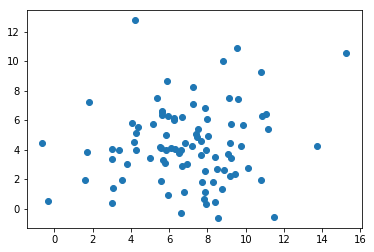

In [8]:
plt.scatter(ohnologs_goi['AS_WT_cont_mean_low'], ohnologs_goi['AS_WT_cont_mean_high'])

In [4]:
colors = {'low': 'blue', 'high': 'red'}

hover_text = []
for ind, row in ohnologs_goi.iterrows():
    hover_text.append(('Low Paralog: {SC_common_name_low}<br>  LFC: {LFC_low:.2f}<br>  -log10(pval): {pval_low:.2f}<br>' +
                       'High Paralog: {SC_common_name_high}<br>  LFC: {LFC_high:.2f}<br>  -log10(pval): {pval_high:.2f}').format(
                        SC_common_name_low = row['SC_common_name_low'],
                        LFC_low = row['log2FoldChange_low'],
                        pval_low = -np.log10(row['pvalue_low']),
                        SC_common_name_high = row['SC_common_name_high'],
                        LFC_high = row['log2FoldChange_high'],
                        pval_high = -np.log10(row['pvalue_high']))
                      )
data = []

for level in ['low','high']:
    trace = pygo.Scatter(
                x = ohnologs_goi['AS_WT_cont_mean_' + level], 
                y =  ohnologs_goi['AS_WT_drug_mean_' + level],
                text = hover_text,
                mode = 'markers',
                marker = {'opacity': 0.9,  
                          'color': colors[level],
                          'size': 10}, 
                name = level + ' induction paralogs'
            )

    data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": 'rlog -drug'
    },
    yaxis= {
        #"range":[-10, 10],
        "title": 'rlog +drug'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= 'rlog_for_paralogs')

In [42]:
#Merge k.lac data with ohnolog_gois
ohnologs_goi_klorth = ohnologs_goi.merge(kl_orthologs, how='inner', left_on='sc_genename_low',right_on='sc_genename')
ohnologs_goi_klorth_rlog = ohnologs_goi_klorth.merge(rlog_data_mean_var['KL'], how = 'inner', left_on='kl_genename', right_index = True)

In [54]:
len(ohnologs_goi)

91

C:\Users\BMH_work\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'K.Lac Orthologs')

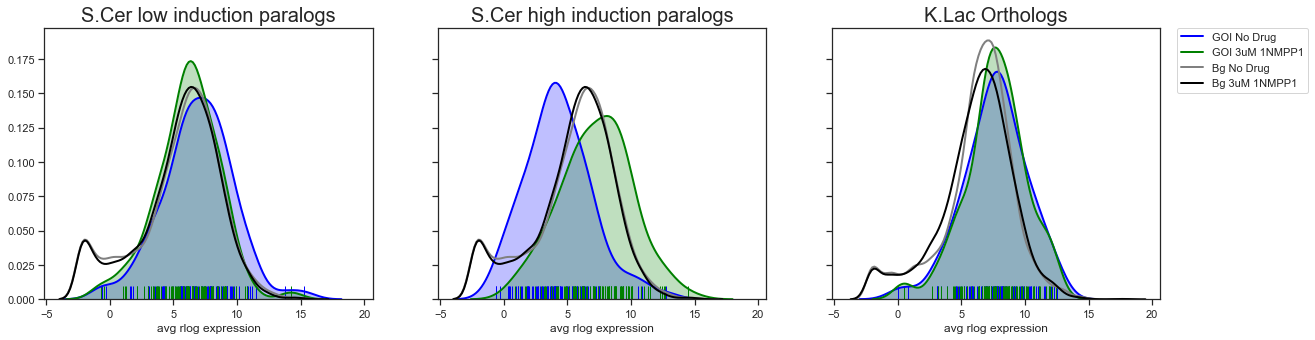

In [50]:
## Make Histograms (put dots on x axis)

fig, axarr = plt.subplots(1,3, sharex=True, sharey=True, figsize = [20,5])

level = 'low'

for jj, level in enumerate(['low','high']):
    ax = axarr[jj]
    sns.distplot(ohnologs_goi['AS_WT_cont_mean_' + level], hist=False, rug=True, ax=ax, 
                 rug_kws={"color": "blue"},
                 kde_kws={"color": "blue", "shade":True, "lw": 2, "label": "GOI No Drug"})
    sns.distplot(ohnologs_goi['AS_WT_drug_mean_' + level], hist=False, rug=True, ax=ax, 
                 rug_kws={"color": "green"},
                 kde_kws={"color": "green", "shade":True, "lw": 2, "label": "GOI 3uM 1NMPP1"})
    sns.distplot(rlog_data_mean_var['SC']['AS_WT_cont_mean'], hist=False, ax=ax,
                 kde_kws={"color": "grey",  "lw": 2, "label": "Bg No Drug"})
    sns.distplot(rlog_data_mean_var['SC']['AS_WT_drug_mean'], hist=False, ax=ax,
                 kde_kws={"color": "black",  "lw": 2, "label": "Bg 3uM 1NMPP1"})

    ax.get_legend().remove()
    ax.set_xlabel('avg rlog expression')
    ax.set_title('S.Cer ' + level + ' induction paralogs', fontsize = 20)



ax = axarr[2]
sns.distplot(ohnologs_goi_klorth_rlog['AS_WT_cont_mean'], hist=False, rug=True, ax=ax, 
             rug_kws={"color": "blue"},
             kde_kws={"color": "blue", "shade":True, "lw": 2, "label": "GOI No Drug"})
sns.distplot(ohnologs_goi_klorth_rlog['AS_WT_drug_mean'], hist=False, rug=True, ax=ax, 
             rug_kws={"color": "green"},
             kde_kws={"color": "green", "shade":True, "lw": 2, "label": "GOI 3uM 1NMPP1"})
sns.distplot(rlog_data_mean_var['KL']['AS_WT_cont_mean'], hist=False, ax=ax,
             kde_kws={"color": "grey",  "lw": 2, "label": "Bg No Drug"})
sns.distplot(rlog_data_mean_var['KL']['AS_WT_drug_mean'], hist=False, ax=ax,
             kde_kws={"color": "black",  "lw": 2, "label": "Bg 3uM 1NMPP1"})
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('avg rlog expression')
ax.set_title('K.Lac Orthologs', fontsize = 20)



    
    

    

Figure [rlog gois]:  K.Lactis orthologs of the WGH paralogs with differential induction in response to PKA inhibition tend to have constitutive and relatively high expression levels.  This is similar to the low-induction S.Cerevisiae WGH paralogs. Kernel density estimates for average rlog data for the indicated sets of gens are plotted with (green) and without (blue) treatment with 3uM NMPP1 (green).  Data is shown as ticks on the x axis.  The background for the S.Cer genes is all S.Cer genes, and for K.Lac orthologs is all K.Lac genes.  
Note: For the S.Cer genes there are 91 paralog pairs that meet my criteria for differential expression.  87 of those have K.Lac Orthologs

In [5]:
# Load gene lists from both species

gene_sets = {}

for spec in ['SC','KL']:
    fname = data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181128_r1g1_m24_pka_targets_' + spec + '_high_thresh.pkl'
    with open(fname, 'rb') as file:
        data = pickle.load(file)
        gene_set = data[0]
        gene_sets[spec] = gene_set

        
msn24_sets = {}

for spec in ['SC','KL']:
    fname = data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181128_m24_pka_targets_vary_slope_' + spec + '.pkl'
    with open(fname, 'rb') as file:
        msn24_sets[spec] = pickle.load(file)
        

In [6]:
#Compare Msn2/4 activation targets across species

data = []

msn2_level = 'M_75'
#target_set = 'm24_nmpp1_act'

xlabel = 'LFC AS -/+ K.Lac'
ylabel = 'LFC AS -/+ S.Cer'

sc_target_set = set(msn24_sets['SC'][msn2_level]) 
kl_target_set = set(kl_sc_PKA_data.loc[kl_sc_PKA_data['kl_genename'].isin(msn24_sets['KL'][msn2_level]),'sc_genename'])

gene_subset = { 'Neither': set(kl_sc_PKA_data['sc_genename']) - (sc_target_set | kl_target_set),
                'KL only': kl_target_set-sc_target_set, 
                'SC only': sc_target_set-kl_target_set, 
                'Both': sc_target_set & kl_target_set
               }
               
colors = {'KL only':'blue', 
          'SC only':'orange', 
          'Both': 'purple', 
          'Neither': 'gray'}

for geneset_name, geneset in gene_subset.items():
    
    kl_sc_PKA_data_subset = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(geneset)]
    
    opacity = 0.8
    if geneset_name == 'Neither':
        opacity = 0.3
    
    trace = pygo.Scatter(
                x = kl_sc_PKA_data_subset['log2FoldChange_KL'], 
                y =  kl_sc_PKA_data_subset['log2FoldChange_SC'],
                text = kl_sc_PKA_data_subset['SC_common_name'],
                mode = 'markers',
                marker = {'opacity': opacity,  
                          'color': colors[geneset_name],
                          'size': 10}, 
                name = geneset_name
            )

    data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= 'AS_pmNMPP1_kl_v_sc_' + msn2_level)

In [7]:
data = []

target_set = 'r1g1_rep'

xlabel = 'LFC AS -/+ K.Lac'
ylabel = 'LFC AS -/+ S.Cer'

sc_target_set = gene_sets['SC'][target_set]
kl_target_set = set(kl_sc_PKA_data.loc[kl_sc_PKA_data['kl_genename'].isin(gene_sets['KL'][target_set]),'sc_genename'])

gene_subset = { 'Neither': set(kl_sc_PKA_data['sc_genename']) - (sc_target_set | kl_target_set),
                'KL only': kl_target_set-sc_target_set, 
                'SC only': sc_target_set-kl_target_set, 
                'Both': sc_target_set & kl_target_set
               }
               
colors = {'KL only':'blue', 
          'SC only':'orange', 
          'Both': 'purple', 
          'Neither': 'gray'}

for geneset_name, geneset in gene_subset.items():
    
    kl_sc_PKA_data_subset = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(geneset)]
    
    opacity = 0.8
    if geneset_name == 'Neither':
        opacity = 0.3
    
    trace = pygo.Scatter(
                x = kl_sc_PKA_data_subset['log2FoldChange_KL'], 
                y =  kl_sc_PKA_data_subset['log2FoldChange_SC'],
                text = kl_sc_PKA_data_subset['SC_common_name'],
                mode = 'markers',
                marker = {'opacity': opacity,  
                          'color': colors[geneset_name],
                          'size': 10}, 
                name = geneset_name
            )

    data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= 'AS_pmNMPP1_kl_v_sc_' + target_set)

In [15]:
gene_subset['Msn2/4 only']

{'EBG00000981576',
 'EBG00000981954',
 'EBG00000982249',
 'EBG00000982282',
 'KLLA0A00506g',
 'KLLA0A01221g',
 'KLLA0A02387g',
 'KLLA0A02629g',
 'KLLA0A02717g',
 'KLLA0A04081g',
 'KLLA0A04125g',
 'KLLA0A05852g',
 'KLLA0A09229g',
 'KLLA0A10527g',
 'KLLA0A11209g',
 'KLLA0B00803g',
 'KLLA0B04422g',
 'KLLA0B04543g',
 'KLLA0B04620g',
 'KLLA0B08800g',
 'KLLA0B09482g',
 'KLLA0B09526g',
 'KLLA0B09878g',
 'KLLA0B10263g',
 'KLLA0B11770g',
 'KLLA0B11792g',
 'KLLA0B12540g',
 'KLLA0B12672g',
 'KLLA0B12694g',
 'KLLA0B12760g',
 'KLLA0B12892g',
 'KLLA0B13123g',
 'KLLA0B14234g',
 'KLLA0B14751g',
 'KLLA0C01001g',
 'KLLA0C01177g',
 'KLLA0C02035g',
 'KLLA0C02937g',
 'KLLA0C04686g',
 'KLLA0C05324g',
 'KLLA0C05456g',
 'KLLA0C05940g',
 'KLLA0C06006g',
 'KLLA0C06072g',
 'KLLA0C08679g',
 'KLLA0C08888g',
 'KLLA0C10505g',
 'KLLA0C16027g',
 'KLLA0C16269g',
 'KLLA0C16489g',
 'KLLA0C17160g',
 'KLLA0C17886r',
 'KLLA0C17963g',
 'KLLA0C18117g',
 'KLLA0C18722g',
 'KLLA0C18909g',
 'KLLA0C19085g',
 'KLLA0C19132g',
 'KLLA

In [16]:
data = []

spec = 'KL'

msn2_level = 'M_75'

r1g1_rep_genes = gene_sets[spec]['r1g1_rep']
m24_nmpp1_act_genes = set(msn24_sets[spec][msn2_level])

xlabel = 'LFC AS -/+ K.Lac'
ylabel = 'LFC AS -/+ S.Cer'

gene_subset = { 'Neither': set(kl_sc_PKA_data[spec.lower() + '_genename']) - (r1g1_rep_genes | m24_nmpp1_act_genes),
                'Rph1/Gis1 only': r1g1_rep_genes - m24_nmpp1_act_genes, 
                'Msn2/4 only': m24_nmpp1_act_genes - r1g1_rep_genes, 
                'Both': r1g1_rep_genes & m24_nmpp1_act_genes
               }
               
colors = {'Rph1/Gis1 only':'blue', 
          'Msn2/4 only':'red', 
          'Both': 'green', 
          'Neither': 'gray'}

for geneset_name, geneset in gene_subset.items():
    
    kl_sc_PKA_data_subset = kl_sc_PKA_data[kl_sc_PKA_data[spec.lower() + '_genename'].isin(geneset)]
    
    opacity = 0.8
    if geneset_name == 'Neither':
        opacity = 0.3
    
    trace = pygo.Scatter(
                x = kl_sc_PKA_data_subset['log2FoldChange_KL'], 
                y =  kl_sc_PKA_data_subset['log2FoldChange_SC'],
                text = kl_sc_PKA_data_subset['SC_common_name'],
                mode = 'markers',
                marker = {'opacity': opacity,  
                          'color': colors[geneset_name],
                          'size': 10}, 
                name = geneset_name
            )

    data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= 'AS_pmNMPP1_kl_v_sc_' + spec + '_r1g1_m24_'+msn2_level)

In [18]:
kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name']=='GPA1']

,N SCer Orthologs,kl_genename,sc_genename,baseMean_KL,log2FoldChange_KL,lfcSE_KL,stat_KL,pvalue_KL,padj_KL,baseMean_SC,log2FoldChange_SC,lfcSE_SC,stat_SC,pvalue_SC,padj_SC,SC_common_name
3238,1,KLLA0F25916g,YHR005C,488.455583,7.399321,0.55758,13.270415,3.436744e-40,2.080613e-38,122.072697,-0.346963,0.364511,-0.951858,0.341169,0.463977,GPA1
